
#**Client retention -  ML Beginner task**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; 
Every business aims to maximize clients by attracting new ones and retaining existing ones. Retaining clients is more cost-effective than acquiring new ones. 
Predicting churn helps in timely intervention and offering special deals to retain customers.
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; By predicting churn, we can react in a timely manner and attempt to retain a client who wants to leave. Based on data about the services used by the client, we can make them a special offer in an effort to change their decision to switch operators. This makes the task of retention easier to implement than the task of attracting new users, about whom we know nothing yet.<br>

&nbsp;&nbsp;&nbsp;&nbsp; This analysis involves a telecommunications dataset with demographic information, service usage, duration, payment methods, and amounts.
<br>

&nbsp;&nbsp;&nbsp;&nbsp; The task includes data description, hypothesis formulation, churn prediction models, and model comparison: 
1. Data description; 
2. Investigation of dependencies and formulation of hypotheses; 
3. Construction of models for churn prediction (with justification of the choice of each model) based on tested hypotheses and identified relationships; 
4. Evaluation and conclusions. 

 
<br>

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Data description](#1.-Data-description)<br>
[2. EDA](#2.EDA)<br>
[3. Model completion](#3.-Model-Completion)<br>
[4. Evaluation and conclusions](#4.Evaluation-and-(conclusions.) <br>


## Codebook
<br>

[Link for data](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` :<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – ID of the customer <br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` –  (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – is the customer married (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` –  (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – in months <br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – is the customer connected to the phone service (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – is the customer connected to the multiple lines (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – Internet provider (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – Insurance (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – Type of the contract (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` <br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` <br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – (Yes or No)<br>

# 1. Data description

In [25]:
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import *

from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [3]:
# importing dataset and deleting a few missed values
import pandas as pd


df = pd.read_csv('telecom_users.csv', index_col=0)
df.drop(df[df['TotalCharges'] == ' '].index, inplace=True)
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No


In [4]:
df_all = df.copy()
df_all['gender'].replace({'Male':0, 'Female':1}, inplace=True)
df_all['Partner'].replace({'No':0, 'Yes':1}, inplace=True)
df_all['Dependents'].replace({'No':0, 'Yes':1}, inplace=True)
df_all['PhoneService'].replace({'No':0, 'Yes':1}, inplace=True)
df_all['MultipleLines'].replace({'No':0, 'Yes':1, 'No phone service':2}, inplace=True)
df_all['InternetService'].replace({'No':0, 'DSL':1, 'Fiber optic':2}, inplace=True)
df_all['OnlineSecurity'].replace({'No':0, 'Yes':1, 'No internet service':2}, inplace=True)
df_all['OnlineBackup'].replace({'No':0, 'Yes':1, 'No internet service':2}, inplace=True)
df_all['DeviceProtection'].replace({'No':0, 'Yes':1, 'No internet service':2}, inplace=True)
df_all['TechSupport'].replace({'No':0, 'Yes':1, 'No internet service':2}, inplace=True)
df_all['StreamingTV'].replace({'No':0, 'Yes':1, 'No internet service':2}, inplace=True)
df_all['StreamingMovies'].replace({'No':0, 'Yes':1, 'No internet service':2}, inplace=True)
df_all['Contract'].replace({'Two year':0, 'One year':1, 'Month-to-month':2}, inplace=True)
df_all['PaperlessBilling'].replace({'No':0, 'Yes':1}, inplace=True)
df_all['PaymentMethod'].replace({'Credit card (automatic)':0, 'Bank transfer (automatic)':1, 'Electronic check':3, 'Mailed check':4}, inplace=True)
df_all['Churn'].replace({'No':0, 'Yes':1}, inplace=True)

df_all.head(2)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1869,7010-BRBUU,0,0,1,1,72,1,1,0,2,...,2,2,2,2,0,0,0,24.10,1734.65,0
4528,9688-YGXVR,1,0,0,0,44,1,0,2,0,...,1,0,1,0,2,1,0,88.15,3973.2,0


In [27]:
y = df_all['Churn']
X = df_all.drop(['customerID', 'Churn'], axis=1)
X['TotalCharges'] = np.asarray(X['TotalCharges'], dtype=float)


# 2. EDA

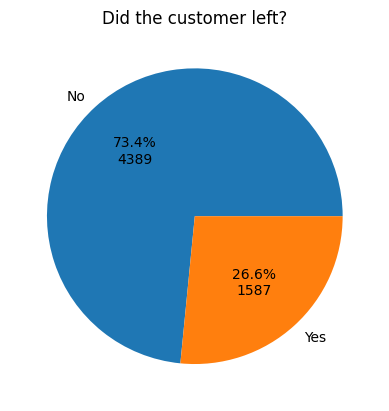

In [6]:
#Checking the share of the customers who left
total = df['Churn'].value_counts().values.sum()

plt.pie(df['Churn'].value_counts().values, labels=df['Churn'].value_counts().index, autopct=lambda x: '{:.1f}%\n{:.0f}'.format(x, total*x/100))
plt.title('Did the customer left?')
plt.show()

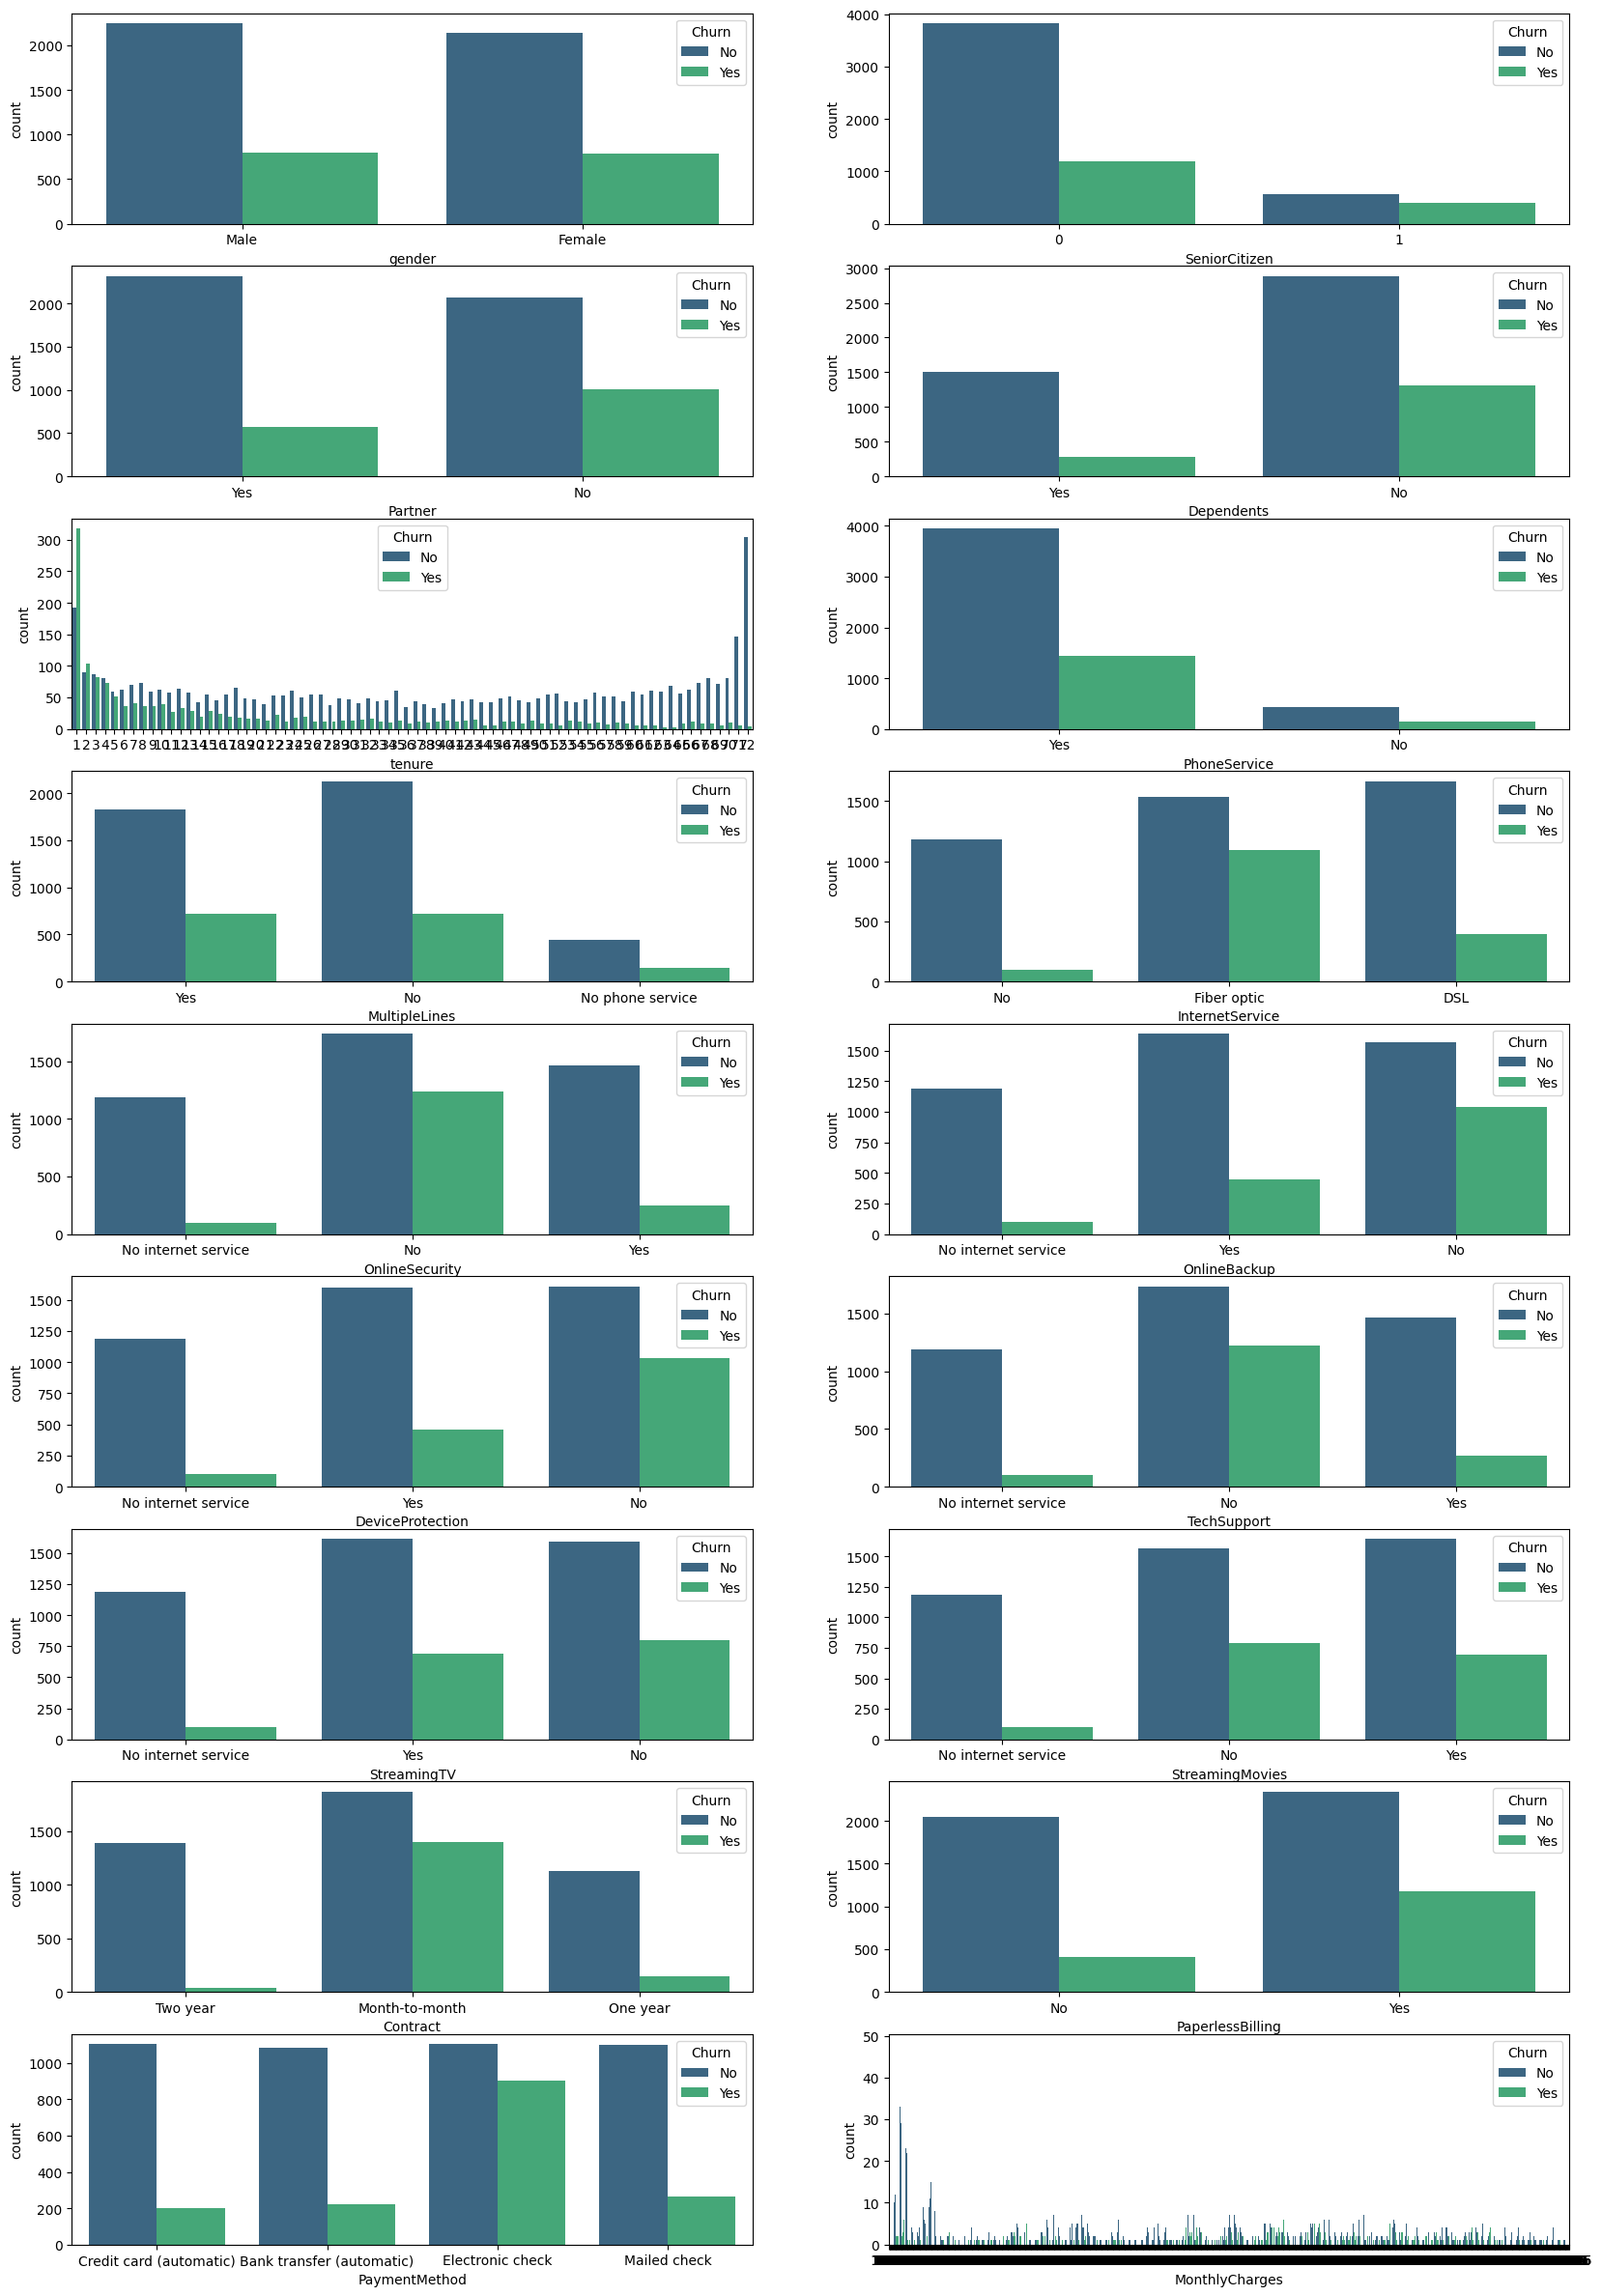

In [7]:
# Checking the main features
fig, axes = plt.subplots(9,2, figsize=(20,30))

sel_col = df.columns.values[1:-1]

for i in range(9):
    for j in range(2):
        sns.countplot(x=sel_col[i*2+j], hue='Churn', palette='viridis', data=df, ax=axes[i,j])

plt.show()

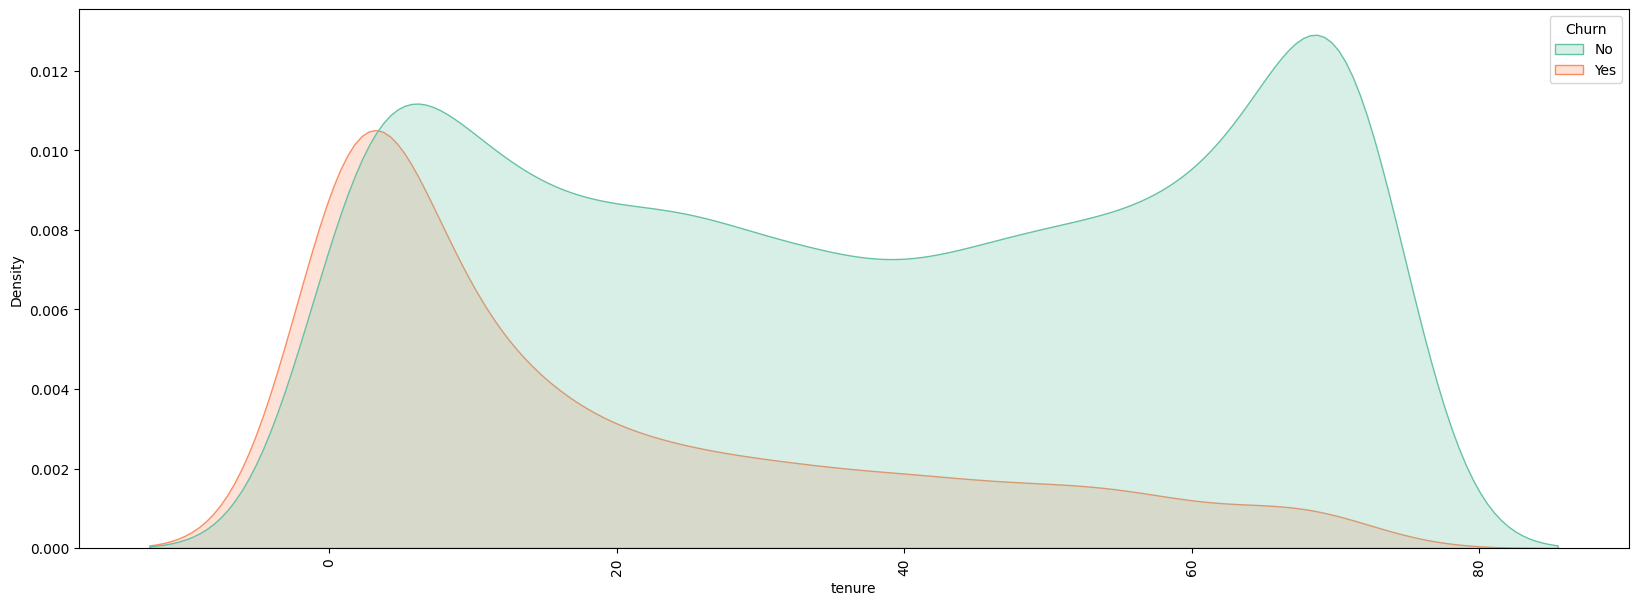

In [8]:
#it's hard to see above what's going on with the tenure, but it might be important 
plt.figure(figsize=(20,7))
sns.kdeplot(data=df, x='tenure', hue='Churn',fill=True, palette='Set2')
plt.xticks(rotation=90)
plt.show()

In [42]:
# scat_mtrx = pd.plotting.scatter_matrix(X, c=y, figsize=(25, 25), marker='o',
#                                        hist_kwds={'bins': 20}, s=40, alpha=.8)


In [9]:
# checking the correllation with the y, in case case of high correllation we might need to discard some feature from the training part
# no high corellation with Churn column deteted
df_all.corr()['Churn']

<ipython-input-9-b183f93c38f0>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_all.corr()['Churn']


gender              0.009377
SeniorCitizen       0.149726
Partner            -0.146378
Dependents         -0.159025
tenure             -0.350420
PhoneService        0.009097
MultipleLines       0.018939
InternetService     0.309839
OnlineSecurity     -0.329621
OnlineBackup       -0.287490
DeviceProtection   -0.278784
TechSupport        -0.323436
StreamingTV        -0.202437
StreamingMovies    -0.204235
Contract            0.395848
PaperlessBilling    0.188653
PaymentMethod       0.146876
MonthlyCharges      0.186122
Churn               1.000000
Name: Churn, dtype: float64

<ipython-input-11-94ba8169bfbd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_all.corr())


<Axes: >

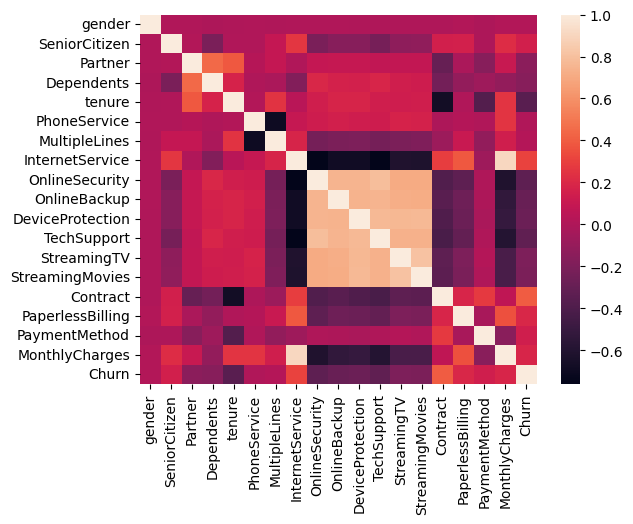

In [11]:
sns.heatmap(df_all.corr())

Key findings:

1. Gender has no much influence on the Churn.
2. Very high Churn during the first months, tenure is important to decide the probability of customer leaving and the increase of the contract length is important for the decrease of Churn.
3. High Churn of people with Fiber Optic.
4. High Churn of customers with no Online Security and Online backup Options.
5. High Churn of customers with no Tech Support (maybe it should be provided to all the customers) 
6. Lovest Churn of customers with automatic payments.


# 3. Model completion

For the predictive model we will try CATBoost, Random Forest and XGBoost. 
<br>
After that we'll stack them together.

In [28]:
#Split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=19)

x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=19)

In [29]:

# model Cat
cat = CatBoostClassifier(random_state=19, verbose=False)
cat.fit(x_train,y_train)

# random forest

rf = RandomForestClassifier(n_estimators=200, max_depth=6, random_state=19)
rf.fit(x_train,y_train)

# XGBoost

params = {
            'objective':'binary:logistic',
            'max_depth': 6,
            'n_estimators':200
        }         
           
xgb = XGBClassifier(**params)
xgb.fit(x_train, y_train) 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

<Axes: >

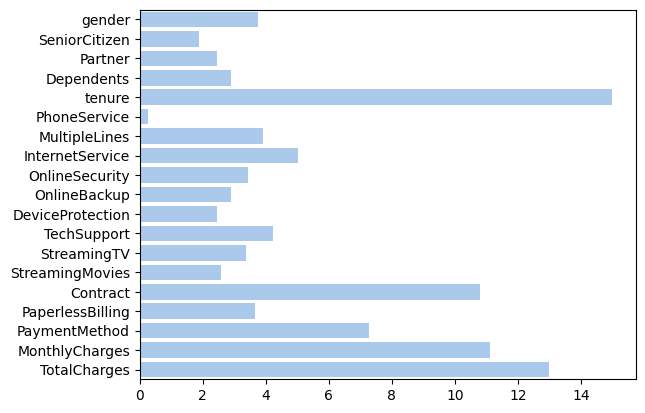

In [30]:
#check feature importance - align with intuition above
cat_features = cat.get_feature_importance()
sns.barplot(x=cat_features, y=x_train.columns.values, color = 'b')


In [31]:
models = [cat, rf, xgb]
meta_mtrx = np.empty((x_val.shape[0], len(models))) # (кол-во объектов, 4 алгоритма)

for n, model in enumerate(models):
    meta_mtrx[:, n] = model.predict(x_val)
    predicted = model.predict(x_test)
    # print(f'{n} auc: {roc_auc_score(y_test, predicted)}')

meta = XGBClassifier(random_state=19)
meta_model = meta.fit(meta_mtrx, y_val)

meta_mtrx_test = np.empty((x_test.shape[0], len(models))) 

for n, model in enumerate(models):
    meta_mtrx_test[:, n] = model.predict(x_test)
    
# meta_predict = meta.predict(meta_mtrx_test)
# print(f'Stacking AUC: {roc_auc_score(y_test, meta_predict)}')

0 auc: 0.7253627779286209
1 auc: 0.7138443901408876
2 auc: 0.74081817359037


# 4. Evaluation and conclusions.


CAT:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       635
           1       0.68      0.56      0.61       261

    accuracy                           0.79       896
   macro avg       0.76      0.73      0.74       896
weighted avg       0.79      0.79      0.79       896

Cross-validation roc_auc score : 0.838657852282541
Cross-validation accuracy score : 0.7990278613509467


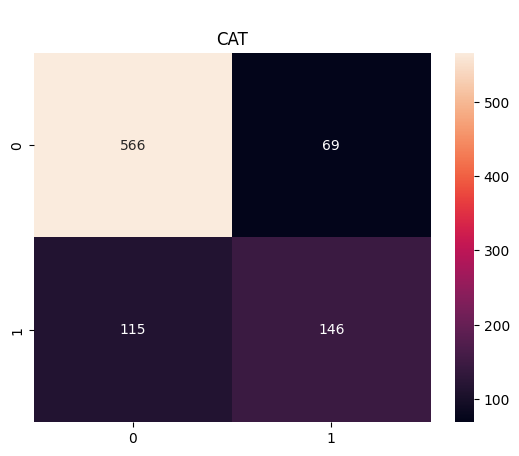

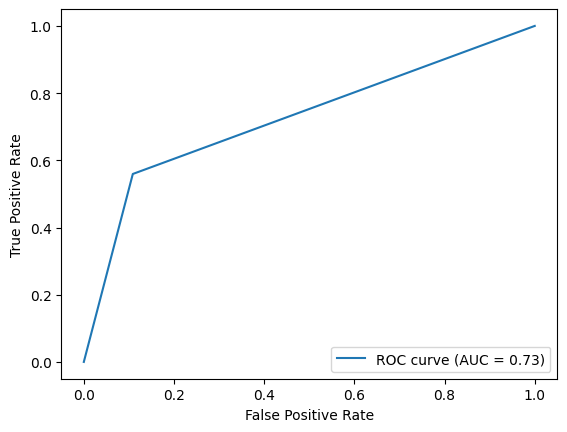


Random Forest:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       635
           1       0.72      0.51      0.60       261

    accuracy                           0.80       896
   macro avg       0.77      0.71      0.73       896
weighted avg       0.79      0.80      0.79       896

Cross-validation roc_auc score : 0.8439339540583799
Cross-validation accuracy score : 0.7980245168693413


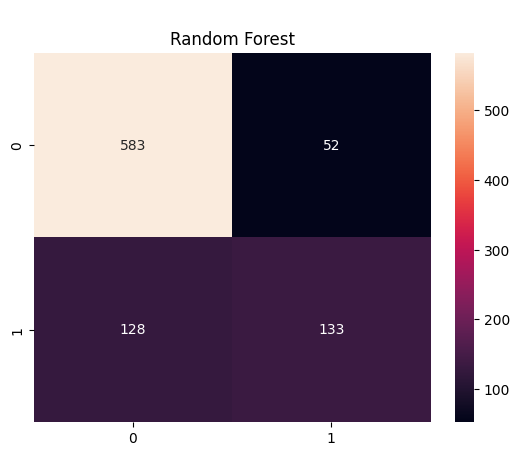

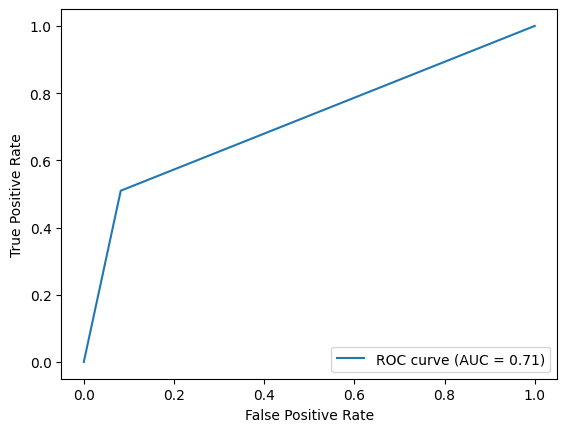


XGBoost:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       635
           1       0.66      0.61      0.63       261

    accuracy                           0.80       896
   macro avg       0.75      0.74      0.75       896
weighted avg       0.79      0.80      0.79       896

Cross-validation roc_auc score : 0.8111793999918634
Cross-validation accuracy score : 0.7796169938847763


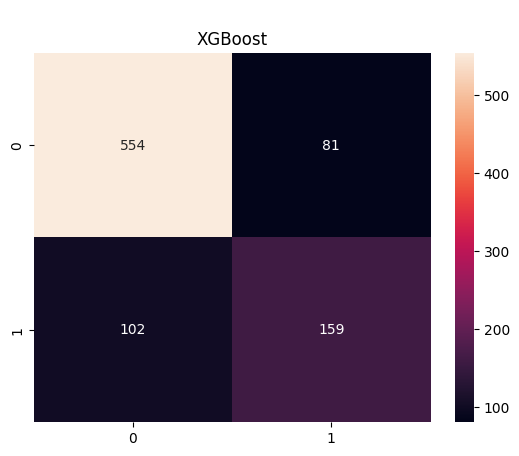

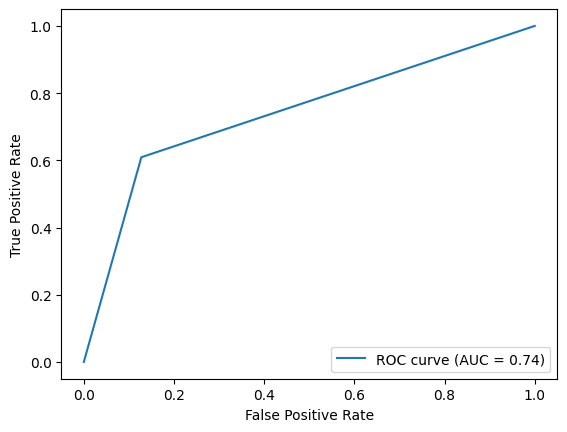


Stacked:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       635
           1       0.69      0.56      0.62       261

    accuracy                           0.80       896
   macro avg       0.76      0.73      0.74       896
weighted avg       0.79      0.80      0.79       896

Cross-validation roc_auc score : 0.8283192028062473
Cross-validation accuracy score : 0.7891563230293447


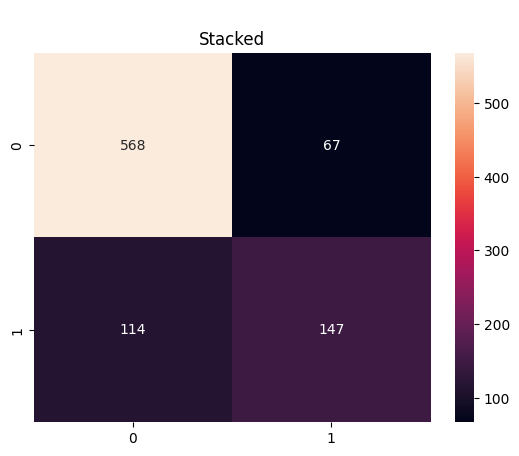

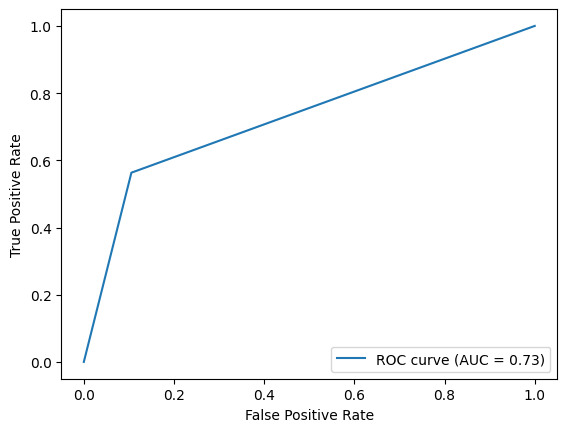

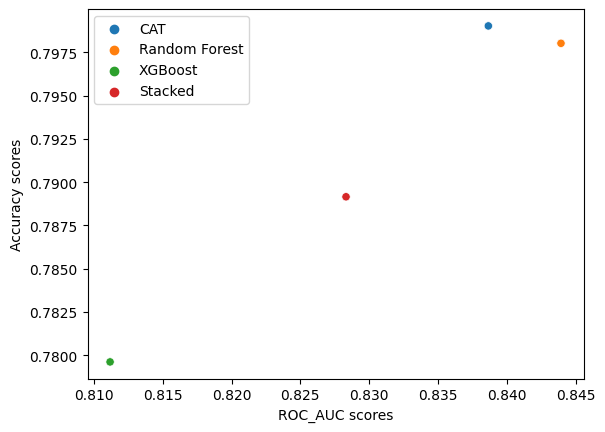

In [61]:
model_names = ['CAT', 'Random Forest', 'XGBoost', 'Stacked']
all_models = models + [meta] 
all_results = []

#evaluate the models
for n, model in enumerate(all_models):
  print(f'\n{model_names[n]}:')
  if n == 3:
    y_pred = meta.predict(meta_mtrx_test)
  else:
    y_pred = model.predict(x_test)
  print(classification_report(y_test, y_pred))
  ra_score = cross_val_score(model, X, y, cv=5, scoring='roc_auc').mean()
  accuracy_score = cross_val_score(model, X, y, cv=5, scoring='accuracy').mean()
  print("Cross-validation roc_auc score :", ra_score)
  print("Cross-validation accuracy score :", accuracy_score)
  
  #for the plotting
  all_results.append((ra_score, accuracy_score))
  
  #showing the charts for each model
  plt.figsize=(5,5)
  plt.title(f'\n{model_names[n]}')
  conf_mat = confusion_matrix(y_test, y_pred)
  sns.heatmap(conf_mat, annot=True, fmt="g")
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  roc_auc = auc(fpr, tpr)
  display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
  display.plot()
  plt.show()

#showing the total comparison
results = pd.DataFrame({'ROC_AUC scores': [r for r,a in all_results], 'Accuracy scores':[a for r,a in all_results]})
sns.scatterplot(data= results, x = 'ROC_AUC scores', y= 'Accuracy scores', hue=model_names )

plt.show()


##Conclusions

We have analysed the dataset and developed a few models for the Churn Prediction and compared them.

Key findings are:

1. Gender has no much influence on the Churn.
2. Very high Churn observed during the first months, and the increase of the contract length is very important for the decrease of Churn. First month are critical.
3. High Churn of people with Fiber Optic, it's better to look into that, what problems might cause that.
4. High Churn of customers with no Online Security and Online backup Options and with no Tech Support. Maybe it should be provided to larger amount of the customers, depending on the business costs. 
6. Lovest Churn of customers with automatic payments observed, share of this types of payment should be maximized.

Models in general show ~80% accuracy. Therefore it is important to decide, which alignes better with business goals: to proactively give special offers to the clients, whom model might wrongly classify as leaving, or to spend as little money as possible while minimizing the Churn (and therefore to choose which model gives better score on Recall/Precision metrics). 

We tried CATBoost, Random Forest and XGBoost and their Stacking.
The best results showed CATBoost and Random Forest models.


##Additional techniques.

We can try to improve the results using Grid Search, amending dataset to categorical encoding and reducing number of features. But as following analysis showed, there will be no significant increase of efficiency and the additional measures might lead to overfitting.

In [65]:
#Grid search for XGBoost model 
parameter_space = {'n_estimators': np.linspace(20, 200, 10).astype(int),
                  'max_depth': np.linspace(1, 10, 10).astype(int)}

clf = GridSearchCV(xgb, parameter_space, n_jobs=-1, cv=15)
clf.fit(x_train, y_train)

print(clf.best_params_, clf.best_score_)

{'max_depth': 1, 'n_estimators': 120} 0.8065968730392029


In [63]:
#Grid search for CATBoost model 
parameter_space = {'n_estimators': np.linspace(20, 200, 10).astype(int),
                  'max_depth': np.linspace(1, 10, 10).astype(int)}

clf = GridSearchCV(cat, parameter_space, n_jobs=-1, cv=5)
clf.fit(x_train, y_train)

print(clf.best_params_, clf.best_score_)

{'max_depth': 2, 'n_estimators': 180} 0.8061180566273943


In [66]:
#reducing the number of features 

from sklearn.feature_selection import RFECV


selector = RFECV(xgb, cv=5)
selector.fit(x_train, y_train)
optimized_columns = x_train.columns[selector.support_]
optimized_columns

x_train_optimized = x_train[optimized_columns]

xgb_optimized = XGBClassifier(max_depth= 1, n_estimators = 120)
xgb_optimized.fit(x_train_optimized, y_train) 

ra_score = cross_val_score(xgb_optimized, X, y, cv=5, scoring='roc_auc').mean()
accuracy_score = cross_val_score(xgb_optimized, X, y, cv=5, scoring='accuracy').mean()
print("Cross-validation roc_auc score :", ra_score)
print("Cross-validation accuracy score :", accuracy_score)

#for the plotting
all_results.append((ra_score, accuracy_score))
model_names.append('XGB optimized features')


Cross-validation roc_auc score : 0.8465233608839571
Cross-validation accuracy score : 0.8022065182407188


Making dataset with "new" features

In [74]:
#Categorical dataset

df_cat = df.copy()
df_cat['Churn'].replace({'No':0, 'Yes':1}, inplace=True)
y_cat = df_cat['Churn']
X_cat = df_cat.drop(['customerID', 'Churn'], axis=1)
X_cat['TotalCharges'] = np.asarray(X_cat['TotalCharges'], dtype=float)

In [75]:
def create_dummies(df,column_name):
    #Create One Hot Encoding - Dummy Columns
    
    dummies = pd.get_dummies(df[column_name],prefix=column_name, drop_first=True)
    df = pd.concat([df,dummies],axis=1)
    df = df.drop(column_name, axis=1)
    return df


for column in sel_col[:4]:
  X_cat = create_dummies(X_cat, column)

for column in sel_col[5:-2]:
  X_cat = create_dummies(X_cat, column)

In [76]:
x_train_cat, x_test_cat, y_train_cat, y_test_cat = train_test_split(X_cat, y_cat, test_size=0.3, stratify=y_cat, random_state=19)

In [90]:
cat_cat = CatBoostClassifier(verbose=False, random_state=19)

# model fitting
cat_cat.fit(x_train_cat,y_train_cat)

In [91]:
ra_score = cross_val_score(cat_cat, X, y, cv=5, scoring='roc_auc').mean()
accuracy_score = cross_val_score(cat_cat, X, y, cv=5, scoring='accuracy').mean()
print("Cross-validation roc_auc score :", ra_score)
print("Cross-validation accuracy score :", accuracy_score)

#for the plotting
all_results.append((ra_score, accuracy_score))
model_names.append('CAT categorical df')

Cross-validation roc_auc score : 0.838657852282541
Cross-validation accuracy score : 0.7990278613509467


In [97]:

xgb_cat = XGBClassifier(random_state=19)

# model fitting
xgb_cat.fit(x_train_cat,y_train_cat)

ra_score = cross_val_score(xgb_cat, X, y, cv=5, scoring='roc_auc').mean()
accuracy_score = cross_val_score(xgb_cat, X, y, cv=5, scoring='accuracy').mean()
print("Cross-validation roc_auc score :", ra_score)
print("Cross-validation accuracy score :", accuracy_score)

#for the plotting
all_results.append((ra_score, accuracy_score))
model_names.append('XGB categorical df')

Cross-validation roc_auc score : 0.8180239786070876
Cross-validation accuracy score : 0.7856409789955361


In [93]:
selector = RFECV(xgb_cat, cv=5)
selector.fit(x_train_cat, y_train_cat)
optimized_columns = x_train_cat.columns[selector.support_]
optimized_columns

x_train_cat_optimized = x_train_cat[optimized_columns]

xgb_cat_optimized = XGBClassifier(random_state=19)
xgb_cat_optimized.fit(x_train_cat_optimized, y_train_cat) 

ra_score = cross_val_score(xgb_cat_optimized, X, y, cv=5, scoring='roc_auc').mean()
accuracy_score = cross_val_score(xgb_cat_optimized, X, y, cv=5, scoring='accuracy').mean()
print("Cross-validation roc_auc score :", ra_score)
print("Cross-validation accuracy score :", accuracy_score)

#for the plotting
all_results.append((ra_score, accuracy_score))
model_names.append('XGB categorical df, optimized features')

Cross-validation roc_auc score : 0.8180239786070876
Cross-validation accuracy score : 0.7856409789955361


In [99]:
cat_cat_optimized = CatBoostClassifier(verbose=False, random_state=19)
cat_cat_optimized.fit(x_train_cat_optimized, y_train_cat) 

ra_score = cross_val_score(cat_cat_optimized, X, y, cv=5, scoring='roc_auc').mean()
accuracy_score = cross_val_score(cat_cat_optimized, X, y, cv=5, scoring='accuracy').mean()
print("Cross-validation roc_auc score :", ra_score)
print("Cross-validation accuracy score :", accuracy_score)

#for the plotting
all_results.append((ra_score, accuracy_score))
model_names.append('CAT categorical df, optimized features')

Cross-validation roc_auc score : 0.838657852282541
Cross-validation accuracy score : 0.7990278613509467


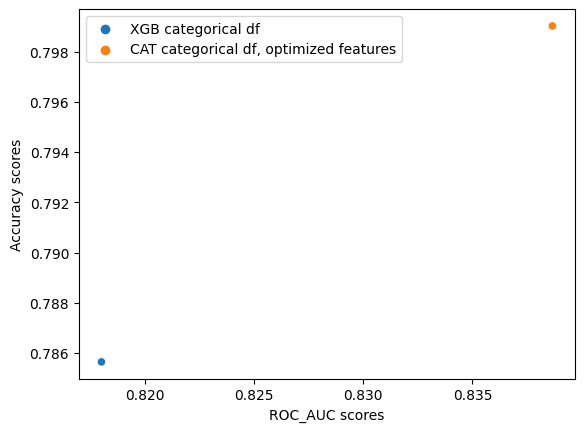

In [100]:
#showing the total comparison
results = pd.DataFrame({'ROC_AUC scores': [r for r,a in all_results], 'Accuracy scores':[a for r,a in all_results]})
sns.scatterplot(data= results, x = 'ROC_AUC scores', y= 'Accuracy scores', hue=model_names )

plt.show()